In [10]:
import os
import sys

import seaborn as sns
import numpy as np
import matplotlib
matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import torch
import pandas as pd
sns.set(style='whitegrid', rc={
    'figure.figsize':(12,8),
    'legend.fontsize': 'large',
    'legend.title_fontsize': 'large',
    'axes.labelsize': 'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'large',
    'ytick.labelsize':'large',
    'font.family': 'sans-serif',
    'font.sans-serif': 'Lucida Grande'
})

from simulated_utils import compare, step, sample_trajectories_by_batch_size, get_obs_acs_rewards_advs
from simulated_utils import HundredActionEnv, DiscPolicy

In [2]:
%matplotlib inline

In [3]:
 def plot_results(data):
    fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)
    sns.lineplot(data=data, x='iter', y='mean_reward', hue='method', ax=axes[0][0], n_boot=100)
    sns.lineplot(data=data, x='iter', y='loss', hue='method', ax=axes[0][1], n_boot=100)
    sns.lineplot(data=data, x='iter', y='pd_param_0_mean', hue='method', ax=axes[1][0], n_boot=100)
    sns.lineplot(data=data, x='iter', y='pd_param_1_mean', hue='method', ax=axes[1][1], n_boot=100)

    handles, labels = axes.flatten()[0].get_legend_handles_labels()
    for ax in axes.flatten():
        ax.get_legend().remove()
    fig.legend(handles[1:], labels[1:], loc='upper center', title='method', ncol=4)
    plt.show()

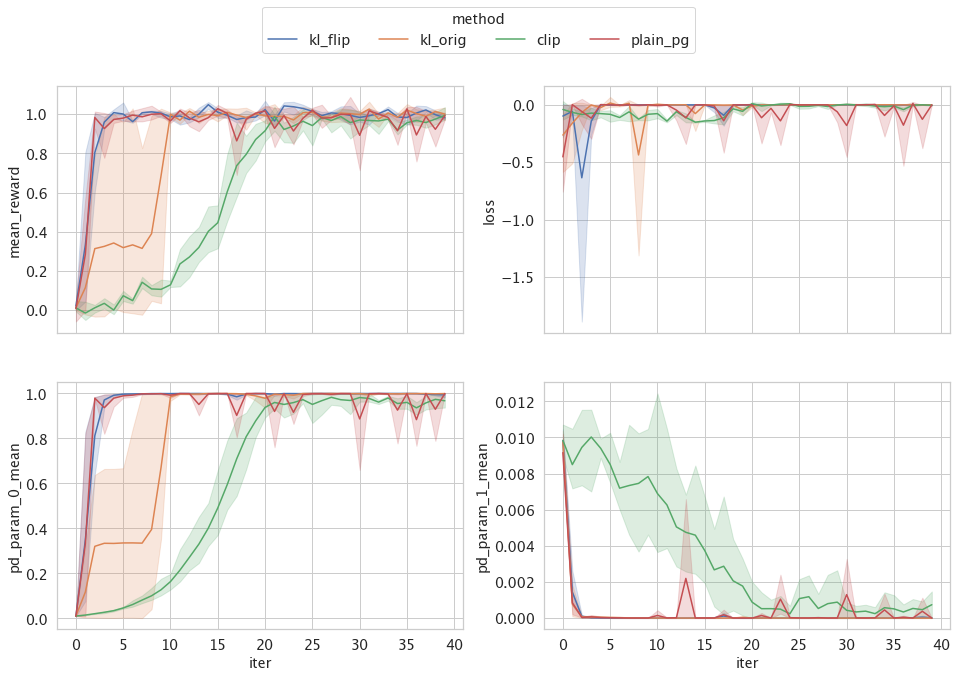

In [27]:
env = HundredActionEnv(noise_std=0.5)
data = compare('discrete', env=env, action_dim=100, n_steps=40, repeats=3, lr=3e-4,
               batch_size=256, num_minibatches=32, ppo_epochs=50)
plot_results(data)

In [8]:
data[data.method == 'clip']

,iter,loss,mean_reward,pd_param_0_mean,pd_param_10_mean,pd_param_11_mean,pd_param_12_mean,pd_param_13_mean,pd_param_14_mean,pd_param_15_mean,...,pd_param_92_mean,pd_param_93_mean,pd_param_94_mean,pd_param_95_mean,pd_param_96_mean,pd_param_97_mean,pd_param_98_mean,pd_param_99_mean,pd_param_9_mean,method
0,0.0,-0.053680,-0.031852,0.009053,0.009809,0.010895,0.009260,0.010517,0.009806,0.009823,...,0.010408,0.010550,0.008867,0.010134,0.009508,0.010011,0.009508,0.010393,0.009325,clip
1,1.0,-0.019752,-0.059872,0.012881,0.008120,0.009250,0.010556,0.011831,0.007151,0.007549,...,0.012300,0.006486,0.006776,0.014714,0.013119,0.011781,0.011228,0.008673,0.007267,clip
2,2.0,-0.139639,0.145205,0.015780,0.008870,0.008563,0.009908,0.009621,0.006906,0.008876,...,0.009713,0.008624,0.005986,0.015792,0.015457,0.009391,0.008990,0.007529,0.005978,clip
3,3.0,-0.128156,0.130256,0.022051,0.010786,0.006416,0.009315,0.007795,0.005453,0.010583,...,0.009133,0.008242,0.007327,0.019388,0.019903,0.010873,0.008902,0.006746,0.004238,clip
4,4.0,-0.136859,0.084155,0.027944,0.010247,0.004853,0.006524,0.009745,0.005461,0.013016,...,0.011680,0.010527,0.008754,0.023814,0.023444,0.013195,0.010070,0.007162,0.003052,clip
5,5.0,-0.108069,0.043652,0.032621,0.009922,0.006709,0.006855,0.007433,0.005689,0.011538,...,0.015547,0.012792,0.007043,0.029189,0.020243,0.011024,0.007618,0.009339,0.002263,clip
6,6.0,-0.096005,0.015559,0.039666,0.008037,0.004766,0.006398,0.007491,0.006386,0.009760,...,0.016088,0.009658,0.007168,0.036314,0.020668,0.008734,0.010407,0.007711,0.001659,clip
7,7.0,-0.034564,0.083915,0.048168,0.010287,0.005901,0.005313,0.007254,0.008218,0.007886,...,0.018183,0.007985,0.005746,0.030947,0.016501,0.009174,0.008061,0.008030,0.001778,clip
8,8.0,-0.136001,0.007732,0.059015,0.012020,0.007091,0.007008,0.005716,0.006209,0.005700,...,0.019217,0.008389,0.004296,0.035322,0.016100,0.010868,0.009535,0.005844,0.001307,clip
9,9.0,0.029446,0.005894,0.075726,0.019911,0.006788,0.008214,0.004785,0.004865,0.006017,...,0.019607,0.006116,0.004763,0.029422,0.019605,0.009297,0.008108,0.007159,0.000963,clip


In [17]:
policy = DiscPolicy(env.obs_dim, env.action_dim, init='xavier', hidden_sizes=[env.action_dim])

In [24]:
step(env, policy)
trajs, steps_in_trajs = sample_trajectories_by_batch_size(
    env, policy, 256, 1)
obs, acs, rewards, advs = get_obs_acs_rewards_advs(trajs)
advs[np.where(acs == 0)[0]], advs.mean(), advs.var()

(array([2.26020222, 0.99137423, 1.98769166, 0.24991651]),
 -8.673617379884035e-18,
 0.9999999642459657)